# FAIKR Module 3 Project

*Group members*:
- Ciapponi Stefano (mat. 0001030211)
- Cortecchia Tommaso

## Aims of the Project:

1. Build a **Bayesian Network Model** starting from a Dataset downloaded from Kaggle
2. Test the Network through queries inspired by the module's content.


**Library imports:**

In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display

## The Dataset
<a href="https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey"> Dataset Link </a>

The chosen dataset contains results from a survey Taken by the <a href="https://stackoverflow.com/"> Stack Overflow Community</a> in the year 2018.

The Survey originally covered numerous different topics concearning the ICT world, but we were mostly interested in **Data regarding the user profiles**.
 
So we decided to apply some pre-processing to reduce the number of variables, but also to simplify the dataset so that the Bayesian Model built from it would become more manageable and readable.


In [62]:
df = pd.read_csv('dataset/survey_results_public.csv', sep=',')
display(df.describe())

C:\Users\fresc\AppData\Local\Temp\ipykernel_23164\3878626423.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/survey_results_public.csv', sep=',')


,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


## Chosen Attributes

Most of the Dataset attributes consisted in **answers to open question** which would have been hard to manage and also contained mixed-type data.

Among the user's information the following attributes have been chosen:

- **Hobby**: *True if the user considers Coding a Hobby.*
- **OpenSource**: *True if the user considers itself an OpenSource supporter*
- **Country**: *The user's Country of origin*
- **Employment**: *The user's employement type (Full-Time Part-Time...)*
- **Formal Education**: *The user's Formal Education (e.g., Bachelor, Master's Degree, etc.)*
- **Undergrad Major**: *The user's major during it's Undergraduate studies*
- **Job Satisfaction**: *A score between 1 and 7 representing the user's Jobs Satisfaction*
- **Converted Salary**: *The user's Salary Converted in USD*

In [63]:
columns=['Hobby','OpenSource','Country','Employment',\
    'FormalEducation','UndergradMajor','JobSatisfaction','ConvertedSalary']

data=df.get(columns).dropna()
data.head()


,Hobby,OpenSource,Country,Employment,FormalEducation,UndergradMajor,JobSatisfaction,ConvertedSalary
1,Yes,Yes,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Moderately dissatisfied,70841.0
4,Yes,No,South Africa,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Slightly satisfied,21426.0
5,Yes,No,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Moderately satisfied,41671.0
6,Yes,Yes,United States,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Slightly satisfied,120000.0
8,Yes,Yes,United States,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,Moderately satisfied,250000.0


The ***JobSatisfaction*** values have been remapped into an integer scale.

In [64]:
js_dict = {
    'Extremely dissatisfied':0,
    'Moderately dissatisfied':1,
    'Slightly dissatisfied':2,
    'Neither satisfied nor dissatisfied':3,
    'Slightly satisfied':4,
    'Moderately satisfied':5,
    'Extremely satisfied':6,
}

data['JobSatisfaction']=data['JobSatisfaction'].map(js_dict)

The Dataset has been pruned from entries which had a Formal Education different from a *Bachelor's Degree, a Master's Degree or a Ph.D* to **reduce the complexity** of the Model.

In [65]:
data = data.replace('Bachelor’s degree (BA, BS, B.Eng., etc.)',"Bachelor")
data = data.replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)',"Master")
data = data.replace('Other doctoral degree (Ph.D, Ed.D., etc.)',"Ph.D")
data = data[data['FormalEducation'].isin(['Bachelor','Master','Ph.D'])]

We considered data concearning only the **three most represented countries** in the Dataset.

In [66]:
countries=data.groupby('Country').size().sort_values()[-3:].index.tolist()
data = data[data['Country'].isin(countries)]

The ***Converted Salary*** attribute has been discretized into three ranges to reduce the Dataset Complexity and to Work on Categorical Values.

<AxesSubplot:>

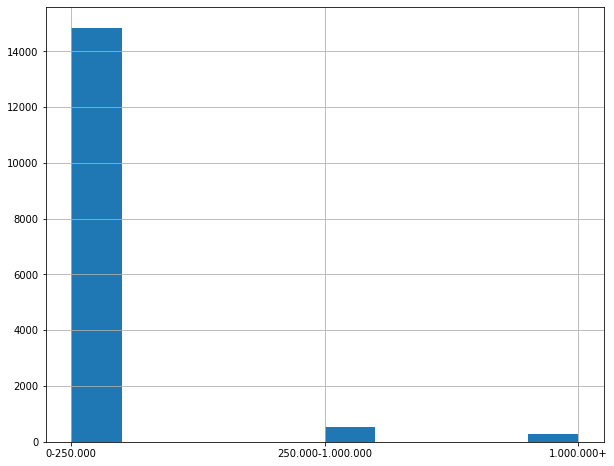

In [67]:
plt.figure(figsize=(10,8))
data.ConvertedSalary=data.ConvertedSalary.map(lambda x: '0-250.000' if x<=250000 else '250.000-1.000.000' if x<=1000000 else '1.000.000+')
data.ConvertedSalary.hist()


The ***Undergrad Major*** Attribute has been Binarized into "STEM" and "NON STEM" majors.

In [68]:
stem=['A natural science (ex. biology, chemistry, physics)',
 'Computer science, computer engineering, or software engineering',
 'Web development or web design',
 'Another engineering discipline (ex. civil, electrical, mechanical)',
 'Mathematics or statistics',
 'Information systems, information technology, or system administration',
]

not_stem=[ 'A social science (ex. anthropology, psychology, political science)',
 'A humanities discipline (ex. literature, history, philosophy)',
 'A business discipline (ex. accounting, finance, marketing)',
 'Fine arts or performing arts (ex. graphic design, music, studio art)',
 'A health science (ex. nursing, pharmacy, radiology)',
]

data=data[data['UndergradMajor'].isin(stem+not_stem)]
data.UndergradMajor=data.UndergradMajor.map(lambda x: 'STEM' if x in stem else 'NOT_STEM')




### Content of the Dataset after applying pre-processing:

In [69]:
display(data.head())
for col in data.columns: 
    print(col,data[col].unique())

,Hobby,OpenSource,Country,Employment,FormalEducation,UndergradMajor,JobSatisfaction,ConvertedSalary
1,Yes,Yes,United Kingdom,Employed full-time,Bachelor,STEM,1,0-250.000
5,Yes,No,United Kingdom,Employed full-time,Bachelor,STEM,5,0-250.000
22,No,No,United Kingdom,Employed full-time,Bachelor,STEM,4,0-250.000
24,Yes,No,India,Employed full-time,Master,STEM,5,0-250.000
27,No,No,United States,Employed full-time,Bachelor,NOT_STEM,5,250.000-1.000.000


Hobby ['Yes' 'No']
OpenSource ['Yes' 'No']
Country ['United Kingdom' 'India' 'United States']
Employment ['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed']
FormalEducation ['Bachelor' 'Master' 'Ph.D']
UndergradMajor ['STEM' 'NOT_STEM']
JobSatisfaction [1 5 4 0 6 2 3]
ConvertedSalary ['0-250.000' '250.000-1.000.000' '1.000.000+']


## Bayesian Network Creation

We decided to test the Dataset Attribute independence through a $Chi^2 Test$ since we are working with Categorical Values.

Each attribute's indipendence has been tested with all the others and a Contingency matrix has been Created. 

*Function that computes Tests on all the Dataset Attributes independences and creates a Contingency matrix*:

- For Readability We decided to set all the the test outpus to 1 if their p values are greater or equal to $\alpha$.

### Chi-Square Test:

The Chi-square test of independence is a statistical hypothesis test used to determine whether two categorical or nominal variables are likely to be related or not.

A test of independence assesses whether observations consisting of measures on two variables, expressed in a contingency table, are independent of each other.

The test Consists in the following steps:

1. Defining an Hypothesis:
     - `Null Hypothesis (H0)`: Two variables are independent.
     - `Alternate Hypothesis (H1)`: Two variables are not independent.
2. Calculating a **Contingency Table** for both Attributes tested:
     - Table showing the distribution of one variable in rows and another in columns.
3. Find the Expected Value
     - $A$ and $B$ are independent iff $P(A \cap B)=P(A)* P(B)$
4. Calculate the $p-value$:
     - $\chi^2=\Sigma\frac{(O_i-E_i)^2}{E_i}$
     - Where:
       - $E_i$ is the expected value computed in the previous step.
       - $O_i$ is the number of observations of type $i$
5. Accept or Reject The Hypothesis:
     - Decide $\alpha$ = Significance level of the Test
     - if: $p-value>\alpha$ `H0` is accepted.
     - Otherwise: `H1` is accepted


In [70]:
def chi2_contingency_mat(data,alpha=None):
    s=data.columns.size
    a = 0
    b = 0
    mat=np.zeros((s,s))
    for i in data.columns:
        for j in data.columns:
            contigency_pct = pd.crosstab(data[i], data[j])
            c, p, dof, expected = chi2_contingency(contigency_pct)
            mat[a][b]=p
            b=b+1
        a = a+1
        b=0
    if alpha:
        mat[mat>=alpha]=1
        mat[mat<alpha]=0
    return mat


$Chi^2$ Contingency matrix plot:

- $\alpha$ has been set to $5\times e^{-7}$ to take in consideration only **Highly Dependant** attributes and take less risk in misjudging the results.

<AxesSubplot:>

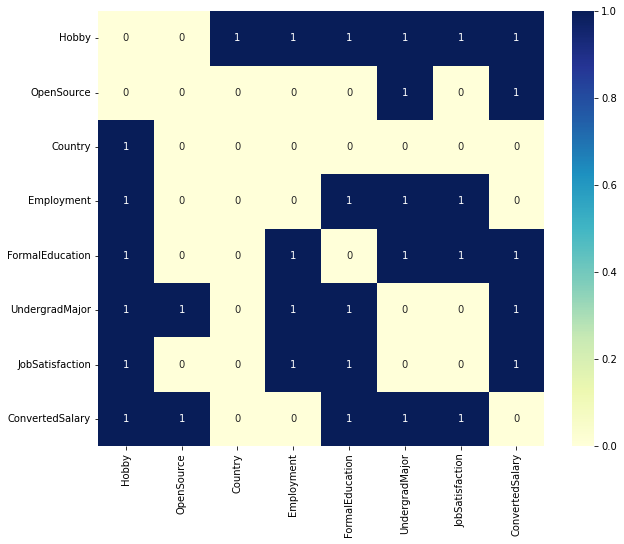

In [72]:
chi2Mat=chi2_contingency_mat(data,5e-7)
labels = list(data.columns)
plt.figure(figsize=(10,8))
sns.heatmap(chi2Mat,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")

As we can see the *Employment* column doesn't really look significative compared to other attributes, so we decided to drop it and recompute the Contingency matrix.

<AxesSubplot:>

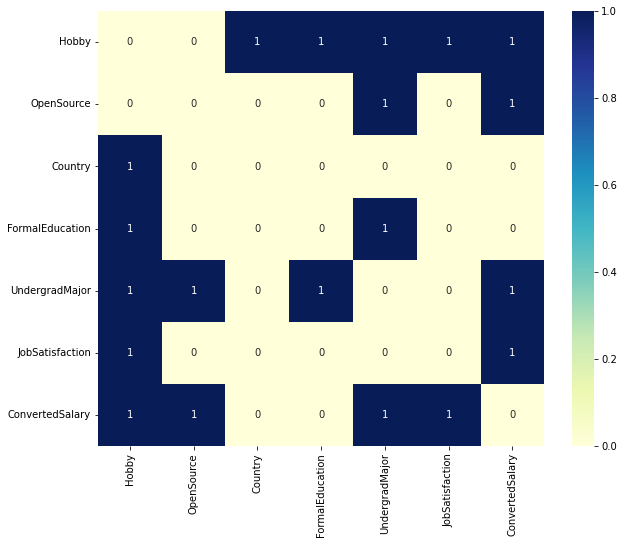

In [74]:
data = data.drop('Employment', axis=1)
chi2Mat=chi2_contingency_mat(data,5e-3)
labels = list(data.columns)
plt.figure(figsize=(10,8))
sns.heatmap(chi2Mat,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")

## GRAPH PLOTTING

In [75]:
def compute_graph_table(data, chi2Mat):

    graph_table = pd.DataFrame()


    source = []
    target=[]

    a=1
    for i in range(data.columns.size):
        for j in range(a, data.columns.size):
            if chi2Mat[i][j]==0:
                source.append(data.columns[i])
                target.append(data.columns[j])
        a=a+1

    type=['Unidirected' for i in range(len(source))]
    weight=[None for i in range(len(source))]
    graph_table['Source']=source
    graph_table['Target']=target
    graph_table['Type']=type
    graph_table['weight']=weight
    return graph_table


In [76]:
graph_table = compute_graph_table(data, chi2Mat)
graph_table

,Source,Target,Type,weight
0,Hobby,OpenSource,Unidirected,None
1,OpenSource,Country,Unidirected,None
2,OpenSource,FormalEducation,Unidirected,None
3,OpenSource,JobSatisfaction,Unidirected,None
4,Country,FormalEducation,Unidirected,None
5,Country,UndergradMajor,Unidirected,None
6,Country,JobSatisfaction,Unidirected,None
7,Country,ConvertedSalary,Unidirected,None
8,FormalEducation,JobSatisfaction,Unidirected,None
9,FormalEducation,ConvertedSalary,Unidirected,None


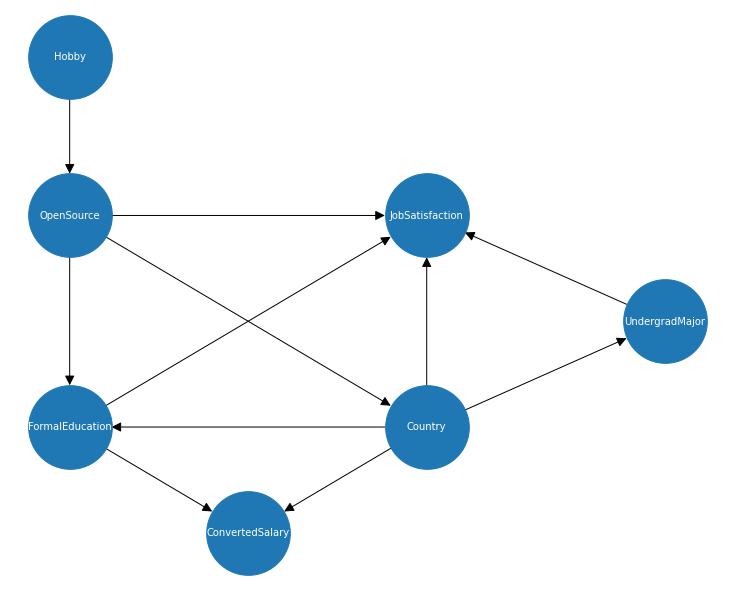

In [77]:
import networkx as nx

G = nx.from_pandas_edgelist(graph_table, source='Source', target='Target',create_using=nx.DiGraph())
# net = Network(notebook=True, directed=True)
# net.from_nx(G)
# net.show('nx.html')
pos={'Hobby':(0.5,10),
     'JobSatisfaction':(2,7),
     'OpenSource':(0.5,7),
     'FormalEducation':(0.5,3),
     'Country':(2,3),
     'ConvertedSalary':(1.25,1),
     'UndergradMajor':(3,5)
 }
plt.figure(figsize=(10,8))

nx.draw(G, arrows=True, with_labels=True, node_size=7000, arrowsize=20, pos=pos, font_size=10, font_color='white')
# print(G.edges())

## Markov Blanket Plotting

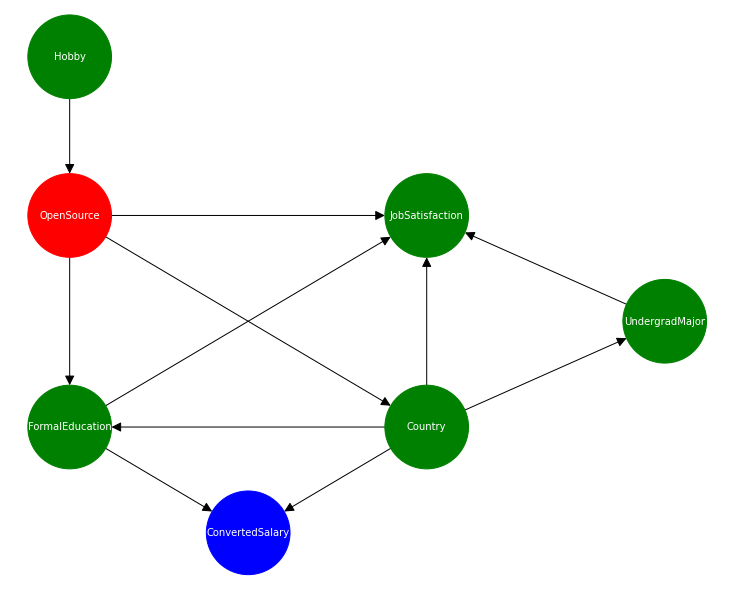

In [78]:
#Function to extract the Markov Blanket of a Node from the Graph
def get_mb(graph, node):
    mb = set()
    parents = [i for i in graph.predecessors(node)]
    mb.update(parents)
    sons = [i for i in graph.successors(node)]
    mb.update(sons)
    sons_parents=[]
    for s in sons:
        sons_parents.extend([i for i in graph.predecessors(s) if i != node])

    mb.update(sons_parents)
    return mb

#Markov Blanket Plotting Function
def plot_mb(G, mb, node):
    pos={'Hobby':(0.5,10),
     'JobSatisfaction':(2,7),
     'OpenSource':(0.5,7),
     'FormalEducation':(0.5,3),
     'Country':(2,3),
     'ConvertedSalary':(1.25,1),
     'UndergradMajor':(3,5)
    }
    plt.figure(figsize=(10,8))
    color_map=[]
    for n in G:
        if n in mb:
            color_map.append('green')
        elif n == node:
            color_map.append('red')
        else: 
            color_map.append('blue')  
    nx.draw(G, arrows=True,node_color=color_map, with_labels=True, node_size=7000, arrowsize=20, pos=pos, font_size=10, font_color='white')

mb=get_mb(G, 'OpenSource')
plot_mb(G, mb, 'OpenSource')
plt.show()

## PGMPY

Function that computes the Graph Edges using the Upper triangular part of the $chi^2$ matrix as an adjacency Table.

In [79]:
def getEdges(mat,names=[]):
    result=[]
    l,_=mat.shape
    for i in range(l): 
        for j in range(i+1,l):
            if mat[i,j]==0:
                if len(names)>0:
                    result.append((names[i],names[j]))
                else: result.append((i,j))
    return result    
edges=getEdges(chi2Mat,names=data.columns)
edges

[('Hobby', 'OpenSource'),
 ('OpenSource', 'Country'),
 ('OpenSource', 'FormalEducation'),
 ('OpenSource', 'JobSatisfaction'),
 ('Country', 'FormalEducation'),
 ('Country', 'UndergradMajor'),
 ('Country', 'JobSatisfaction'),
 ('Country', 'ConvertedSalary'),
 ('FormalEducation', 'JobSatisfaction'),
 ('FormalEducation', 'ConvertedSalary'),
 ('UndergradMajor', 'JobSatisfaction')]

+------------+----------+
| Hobby(No)  | 0.199923 |
+------------+----------+
| Hobby(Yes) | 0.800077 |
+------------+----------+
+-----------------+--------------------+---------------------+
| Hobby           | Hobby(No)          | Hobby(Yes)          |
+-----------------+--------------------+---------------------+
| OpenSource(No)  | 0.7966101694915254 | 0.49800223749400674 |
+-----------------+--------------------+---------------------+
| OpenSource(Yes) | 0.2033898305084746 | 0.5019977625059933  |
+-----------------+--------------------+---------------------+
+-------------------------+---------------------+---------------------+
| OpenSource              | OpenSource(No)      | OpenSource(Yes)     |
+-------------------------+---------------------+---------------------+
| Country(India)          | 0.20440215522182736 | 0.24486845909222318 |
+-------------------------+---------------------+---------------------+
| Country(United Kingdom) | 0.17872291642783447 | 0.16536571263370917

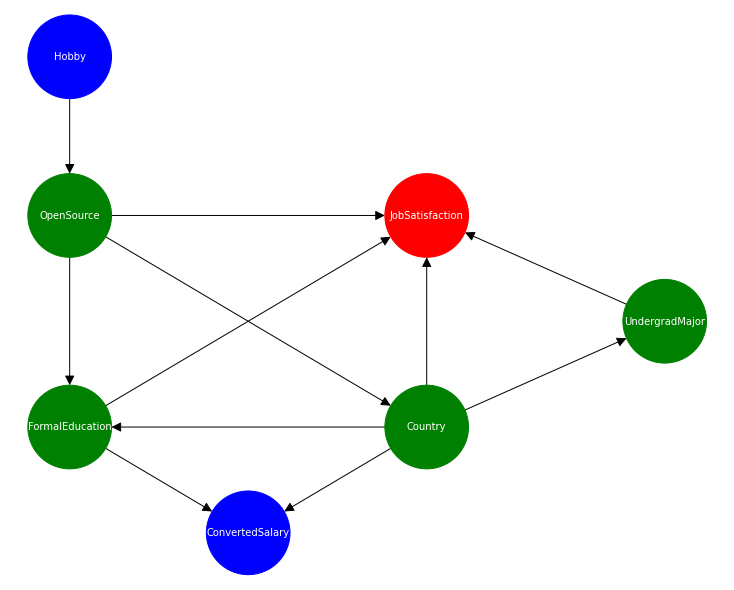

In [80]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator

model= BayesianNetwork(edges)
# pe = ParameterEstimator(model, data)
model.fit(data, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print(cpd)

model.get_independencies()

plot_mb(G, model.get_markov_blanket('JobSatisfaction'), 'JobSatisfaction')


# Markov Blanket Notes
"What the Markov Blanket says, is that all information about a random variable in a Bayesian network is contained within this set of nodes (parents, children, and parents of children). That is, if we observe ALL OF THESE variables, then our node is independent of all other nodes within the network."

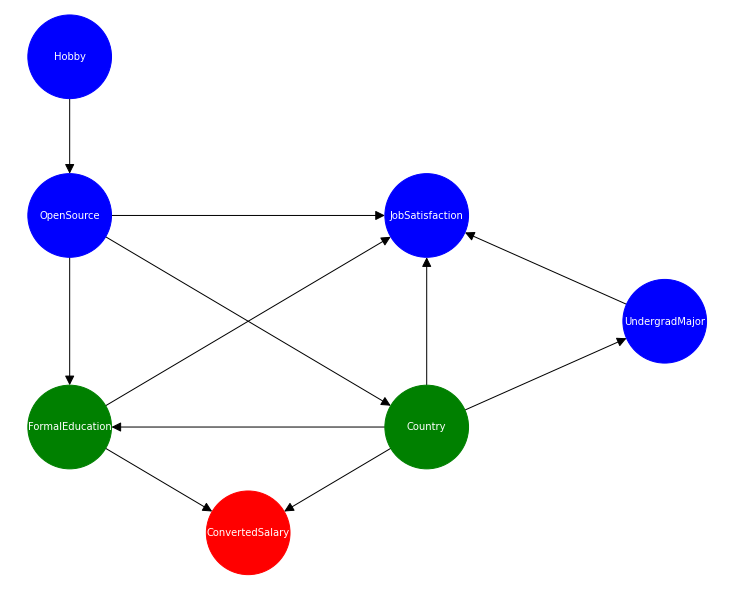

In [81]:
plot_mb(G, model.get_markov_blanket('ConvertedSalary'), 'ConvertedSalary')

As we can see asking the BN the probability of having a certain Converted Salary given its Markov Blanket is the same as adding evidence to other nodes that aren't part of it.
This means that Converted Salary is independent to other nodes.

In [82]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)

pSalary1 = inference.query(['ConvertedSalary'],{'Country':'India','FormalEducation':'Bachelor'})
print(pSalary1)
print("P(ConvertedSalary | Country=India, FormalEducation=Bachelor)")
pSalary2 = inference.query(['ConvertedSalary'],{'Country':'India','FormalEducation':'Bachelor','OpenSource':'Yes'})
print(pSalary2)
print("P(ConvertedSalary | Country=India, FormalEducation=Bachelor, OpenSource=Yes)")

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------------------------------------+------------------------+
| ConvertedSalary                    |   phi(ConvertedSalary) |
+====================================+========================+
| ConvertedSalary(0-250.000)         |                 0.9836 |
+------------------------------------+------------------------+
| ConvertedSalary(1.000.000+)        |                 0.0008 |
+------------------------------------+------------------------+
| ConvertedSalary(250.000-1.000.000) |                 0.0156 |
+------------------------------------+------------------------+
P(ConvertedSalary | Country=India, FormalEducation=Bachelor)


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------------------------------------+------------------------+
| ConvertedSalary                    |   phi(ConvertedSalary) |
+====================================+========================+
| ConvertedSalary(0-250.000)         |                 0.9836 |
+------------------------------------+------------------------+
| ConvertedSalary(1.000.000+)        |                 0.0008 |
+------------------------------------+------------------------+
| ConvertedSalary(250.000-1.000.000) |                 0.0156 |
+------------------------------------+------------------------+
P(ConvertedSalary | Country=India, FormalEducation=Bachelor, OpenSource=Yes)


# Other Queries on Nodes

In [83]:
# Now switch to sampling methods
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling

inference = BayesianModelSampling()
evidence = [State('WetGrass', 1),State('Sprinkler', 1)]
verbose = False

def prob_LW(samples,variable):
    return round(np.sum(np.dot(samples[variable],samples['_weight']))/np.sum(samples['_weight']),2)

def relative_error(exact_value,approx_value):
    return np.absolute((exact_value-approx_value)/exact_value)

def absolute_error(exact_value,approx_value):
    return np.absolute(exact_value-approx_value)

def run_experiment(sample_size):
    # Sample
    samples_LW = inference.likelihood_weighted_sample(evidence = evidence, size=sample_size)
    samples_RS = inference.rejection_sample(evidence=evidence, size=sample_size)

    # Statistics
    pcloudy_LW=prob_LW(samples_LW,'Cloudy')
    prain_LW=prob_LW(samples_LW,'Rain')
    pcloudy_RS=np.mean(samples_RS['Cloudy'], axis=0)
    prain_RS=np.mean(samples_RS['Rain'], axis=0)
    
    # Reporting
    if(verbose):
        print()
        print("P(Cloudy=true|Sprinkler=true,WetGrass=true) =", round(pcloudy,precision))
        print("With Rejection Sampling after %d samples: %.3f (error = %.2f percent)" 
              % (sample_size, pcloudy_RS, absolute_error(pcloudy,pcloudy_RS)*100))
        print("With Likelihood Weighting after %d samples: %.3f (error = %.2f percent)" 
              % (sample_size, pcloudy_LW, absolute_error(pcloudy,pcloudy_LW)*100))
        print()
        print("P(Rain=true|Sprinkler=true,WetGrass=true) =", round(prain,precision))
        print("With Rejection Sampling after %d samples: %.3f (error = %.2f percent)" 
              % (sample_size, prain_RS, absolute_error(prain,prain_RS)*100))
        print("With Likelihood Weighting after %d samples: %.3f (error = %.2f percent)" 
              % (sample_size, prain_LW, absolute_error(prain,prain_LW)*100))
    
    # Return results
    return np.array([(sample_size, 
                      pcloudy_RS, absolute_error(pcloudy,pcloudy_RS),
                      pcloudy_LW, absolute_error(pcloudy,pcloudy_LW),
                      prain_RS, absolute_error(prain,prain_RS),
                      prain_LW, absolute_error(prain,prain_LW))], 
                    dtype=[('sample_size', '<i8'), 
                           ('pcloudy_RS', '<f8'),('e_pcloudy_RS', '<f8'),
                           ('pcloudy_LW', '<f8'),('e_pcloudy_LW', '<f8'),
                           ('prain_RS', '<f8'),('e_prain_RS', '<f8'),
                           ('prain_LW', '<f8'),('e_prain_LW', '<f8')])

# To view samples
# print(samples_LW)
# samples_LW.view()
# print(samples_RS[:5]), print(' ... '), print(samples_RS[nsamples_RS-5:])

TypeError: BayesianModelSampling.__init__() missing 1 required positional argument: 'model'

TypeError: DAG.get_ancestral_graph() missing 1 required positional argument: 'nodes'